In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os

In [2]:
USD_TO_SAR_RATE = 3.75

def convert_usd_to_sar(amount_usd):
    return amount_usd * USD_TO_SAR_RATE

In [3]:
df = pd.read_excel('../../data/economic_burden/Early Diabetes Screening Data.xlsx')
df

,البند,العدد,النسبة المفحوصين
0,عدد مراكز الرعاية الصحية الأولية الإجمالي في م...,904,Null
1,عدد مراكز الرعاية الصحية المطبقة للبرنامج,860,Null
2,عدد السكان الإجمالي في منطقة عمل المراكز المطب...,5419440,0.14
3,عدد المفحوصين للبرنامج,722714,NaN
4,الفئة,العدد,النسبة
5,المفحوصين غير مصابين,641330,0.89
6,المصابين بمرحلة ما قبل السكري,48427,0.07
7,المصابين بالسكري,32912,0.04


In [4]:
print(">>> STEP 1: LOADING DATASETS...")

excel_file = "../../data/economic_burden/Early Diabetes Screening Data.xlsx"
df = pd.read_excel(excel_file)
df
target_column = 'العدد'  

df['numeric_values'] = pd.to_numeric(df[target_column], errors='coerce')

df_clean = df.dropna(subset=['numeric_values']).copy()
df_clean[target_column] = df_clean['numeric_values'].astype(int)
df_clean = df_clean.drop(columns=['numeric_values'])
print("--- Data Types After Cleaning ---")
print(df_clean.dtypes)

print("\n--- Cleaned Data (First 10 Rows) ---")
print(df_clean.head(10))
df_clean.head(3)

>>> STEP 1: LOADING DATASETS...
--- Data Types After Cleaning ---
البند                object
العدد                 int64
النسبة  المفحوصين    object
dtype: object

--- Cleaned Data (First 10 Rows) ---
                                               البند    العدد  \
0  عدد مراكز الرعاية الصحية الأولية الإجمالي في م...      904   
1          عدد مراكز الرعاية الصحية المطبقة للبرنامج      860   
2  عدد السكان الإجمالي في منطقة عمل المراكز المطب...  5419440   
3                             عدد المفحوصين للبرنامج   722714   
5                               المفحوصين غير مصابين   641330   
6                      المصابين بمرحلة ما قبل السكري    48427   
7                                   المصابين بالسكري    32912   

  النسبة  المفحوصين  
0              Null  
1              Null  
2              0.14  
3               NaN  
5              0.89  
6              0.07  
7              0.04  


,البند,العدد,النسبة المفحوصين
0,عدد مراكز الرعاية الصحية الأولية الإجمالي في م...,904,Null
1,عدد مراكز الرعاية الصحية المطبقة للبرنامج,860,Null
2,عدد السكان الإجمالي في منطقة عمل المراكز المطب...,5419440,0.14


In [5]:

print(">>> STEP 1: LOADING DATASETS...")

excel_file = "../../data/economic_burden/Early Diabetes Screening Data.xlsx"
screening_metrics = {}

if os.path.exists(excel_file):
    try:
        df_raw = pd.read_excel(excel_file)
        print(f"   [Success] Loaded: {excel_file}")
        
        df_raw.columns = df_raw.columns.str.strip()
        
        metrics_map = {
            'عدد المفحوصين للبرنامج': 'Total_Screened',
            'المصابين بمرحلة ما قبل السكري': 'Pre_Diabetes',
            'المصابين بالسكري': 'Diabetes_Detected'
        }
        
        for ar_key, en_key in metrics_map.items():
            row = df_raw[df_raw.iloc[:, 0].astype(str).str.contains(ar_key, na=False)]
            if not row.empty:
                val = row.iloc[0, 1]
                clean_val = float(str(val).replace(',', '').replace('nan', '0'))
                screening_metrics[en_key] = clean_val
            else:
                screening_metrics[en_key] = 0.0
                
    except Exception as e:
        print(f"   [Error] Could not read Excel file: {e}")
else:
    print(f"   [Warning] File '{excel_file}' not found. Using placeholder data for demo.")
    screening_metrics = {'Total_Screened': 722714, 'Pre_Diabetes': 48472, 'Diabetes_Detected': 32912}

>>> STEP 1: LOADING DATASETS...
   [Success] Loaded: ../../data/economic_burden/Early Diabetes Screening Data.xlsx


In [6]:
print(">>> STEP 1: LOADING & CLEANING DATA...")
excel_file = "../../data/economic_burden/Early Diabetes Screening Data.xlsx"
screening_metrics = {}
USD_TO_SAR_RATE = 3.75

if os.path.exists(excel_file):
    try:
        df = pd.read_excel(excel_file)
        
        target_col_index = 1 
        
        df['numeric_values'] = pd.to_numeric(df.iloc[:, target_col_index], errors='coerce')
        
        df_clean = df.dropna(subset=['numeric_values']).copy()
        
        df_clean['final_count'] = df_clean['numeric_values'].astype(float)
        
        print(f"   [Success] Data cleaned. Rows remaining: {len(df_clean)}")
        
        metrics_map = {
            'عدد المفحوصين للبرنامج': 'Total_Screened',
            'المصابين بمرحلة ما قبل السكري': 'Pre_Diabetes',
            'المصابين بالسكري': 'Diabetes_Detected'
        }
        
        for ar_key, en_key in metrics_map.items():
            row = df_clean[df_clean.iloc[:, 0].astype(str).str.contains(ar_key, na=False)]
            
            if not row.empty:
                val = row['final_count'].values[0]
                screening_metrics[en_key] = val
                print(f"      - Extracted {en_key}: {val:,.0f}")
            else:
                screening_metrics[en_key] = 0.0
                
    except Exception as e:
        print(f"   [Error] Data processing failed: {e}")
        screening_metrics = {'Total_Screened': 722714, 'Pre_Diabetes': 48472, 'Diabetes_Detected': 32912}
else:
    print(f"   [Warning] File '{excel_file}' not found. Using placeholder data.")
    screening_metrics = {'Total_Screened': 722714, 'Pre_Diabetes': 48472, 'Diabetes_Detected': 32912}

>>> STEP 1: LOADING & CLEANING DATA...
   [Success] Data cleaned. Rows remaining: 7
      - Extracted Total_Screened: 722,714
      - Extracted Pre_Diabetes: 48,427
      - Extracted Diabetes_Detected: 32,912


In [7]:
print("\n>>> STEP 2: RUNNING FINANCIAL MODELS...")

# from research paper boitte
df_macro = pd.DataFrame({
    'Year': [2020, 2030],
    'Cost_USD_Billions': [19.8, 32.4]
})
df_macro['Cost_SAR_Billions'] = df_macro['Cost_USD_Billions'] * USD_TO_SAR_RATE

start_cost = df_macro['Cost_SAR_Billions'].iloc[0]
end_cost = df_macro['Cost_SAR_Billions'].iloc[1]
cagr = (end_cost / start_cost)**(1/10) - 1


df_micro = pd.DataFrame({
    'Component': ['Hospital Admissions', 'Annual Check-ups', 'Consultations', 'Lab Tests', 'Medications'],
    'Annual_Cost_USD': [2686.0, 3472.3, 79.7, 87.9, 73.9]
})
df_micro['Annual_Cost_SAR'] = df_micro['Annual_Cost_USD'] * USD_TO_SAR_RATE

total_patient_cost = df_micro['Annual_Cost_SAR'].sum()
df_micro['Share'] = (df_micro['Annual_Cost_SAR'] / total_patient_cost) * 100
top_driver = df_micro.loc[df_micro['Annual_Cost_SAR'].idxmax()]

savings_per_person_usd = 1300
savings_per_person_sar = savings_per_person_usd * USD_TO_SAR_RATE
pre_diabetic_count = screening_metrics.get('Pre_Diabetes', 0)
potential_savings_sar = pre_diabetic_count * savings_per_person_sar
potential_savings_millions = potential_savings_sar / 1_000_000



print(f"   -> NCD Budget CAGR: {cagr:.2%} (Growth Rate)")
print(f"   -> Top Cost Driver: {top_driver['Component']} ({top_driver['Share']:.1f}%)")
print(f"   -> Screening ROI:   Identified {int(pre_diabetic_count):,} Pre-Diabetics")
print(f"   -> Potential Saving:{potential_savings_millions:.2f} Million SAR / Year")


>>> STEP 2: RUNNING FINANCIAL MODELS...
   -> NCD Budget CAGR: 5.05% (Growth Rate)
   -> Top Cost Driver: Annual Check-ups (54.3%)
   -> Screening ROI:   Identified 48,427 Pre-Diabetics
   -> Potential Saving:236.08 Million SAR / Year


In [8]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
def save_plot(filename):
    plt.tight_layout()
    plt.savefig(filename)
    print(f"   [Output] Chart saved as: {filename}")
    plt.close()


>>> STEP 3: GENERATING CHARTS...


C:\Users\DSC-GDP075\AppData\Local\Temp\ipykernel_21368\3876599409.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_macro, x='Year', y='Cost_SAR_Billions', palette=colors_macro, ax=ax1)


Text(0.05, 0.95, 'Insight: Costs will grow by 63% by 2030.\nStatus quo is fiscally unsustainable.')

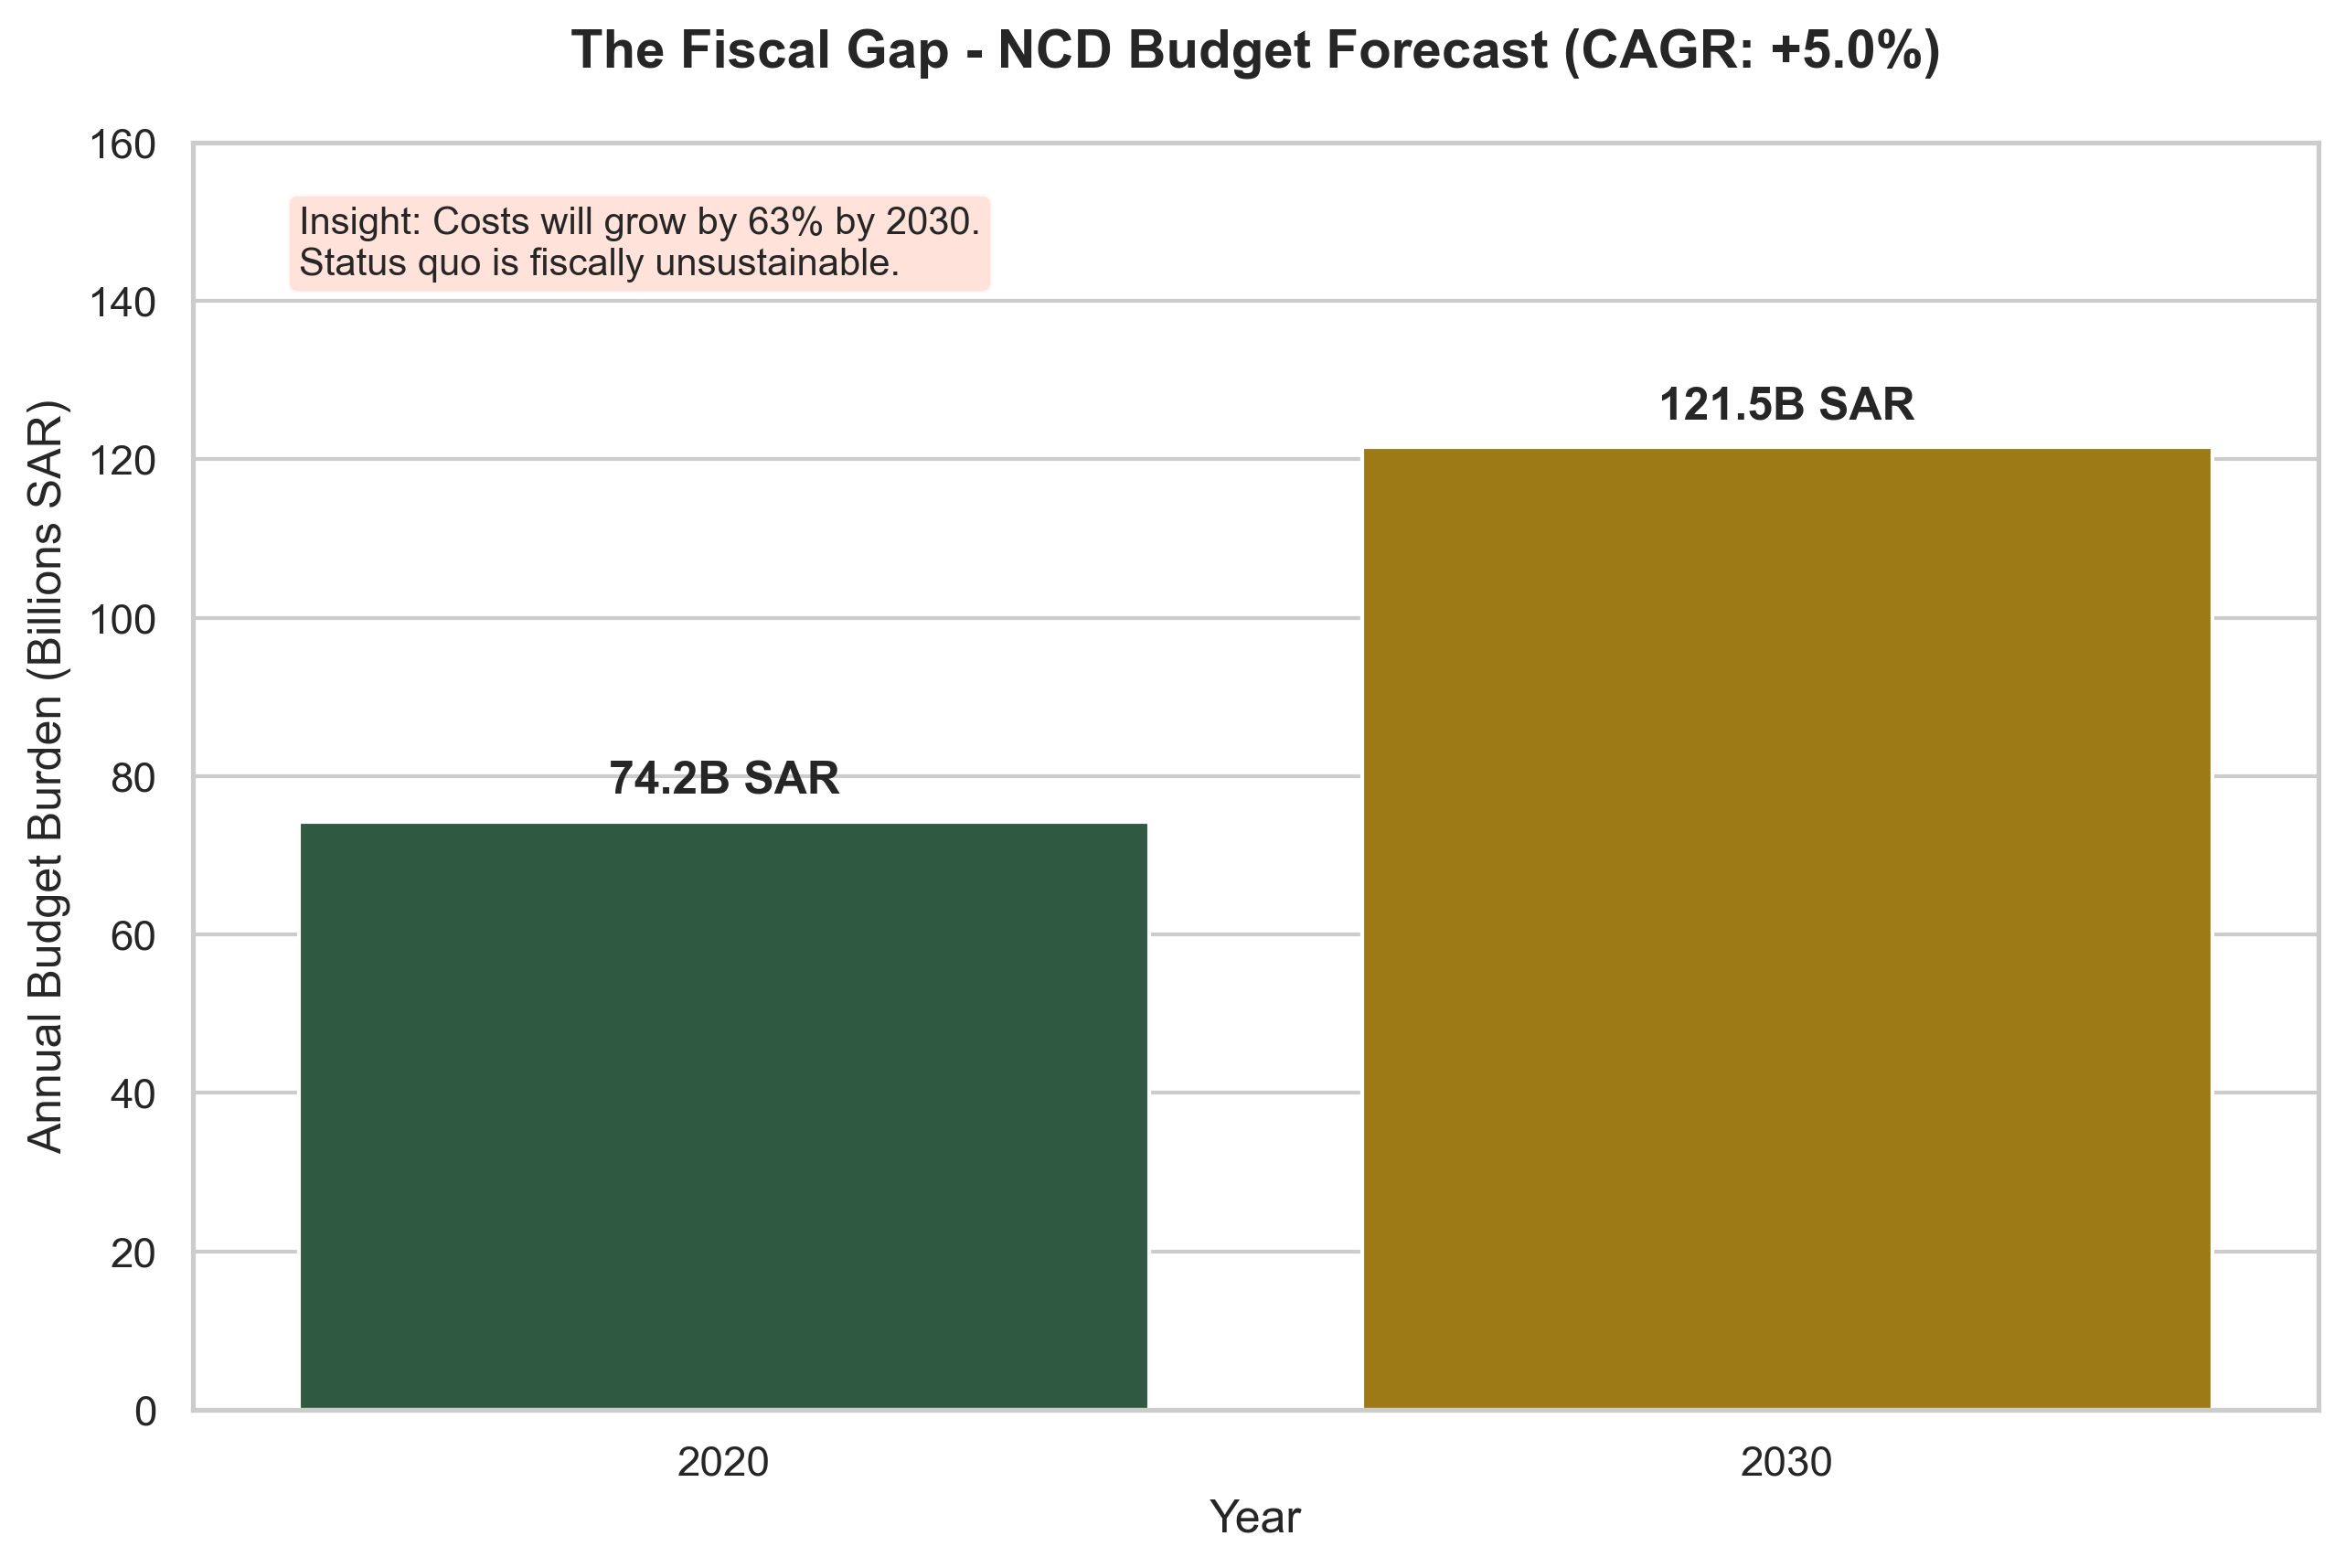

In [9]:
print("\n>>> STEP 3: GENERATING CHARTS...")

fig1, ax1 = plt.subplots(figsize=(10, 6))
colors_macro = ['#286140', '#b58500'] 

sns.barplot(data=df_macro, x='Year', y='Cost_SAR_Billions', palette=colors_macro, ax=ax1)

ax1.set_title(f'The Fiscal Gap - NCD Budget Forecast (CAGR: +{cagr:.1%})', pad=20)
ax1.set_ylabel('Annual Budget Burden (Billions SAR)')
ax1.set_ylim(0, 160)

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}B SAR', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12, weight='bold', xytext=(0, 5), textcoords='offset points')

ax1.text(0.05, 0.95, "Insight: Costs will grow by 63% by 2030.\nStatus quo is fiscally unsustainable.", 
         transform=ax1.transAxes, fontsize=10, va='top', bbox=dict(boxstyle='round', facecolor='#ffddd2', alpha=0.8))

#save_plot('Page1_Macro_Burden.png')

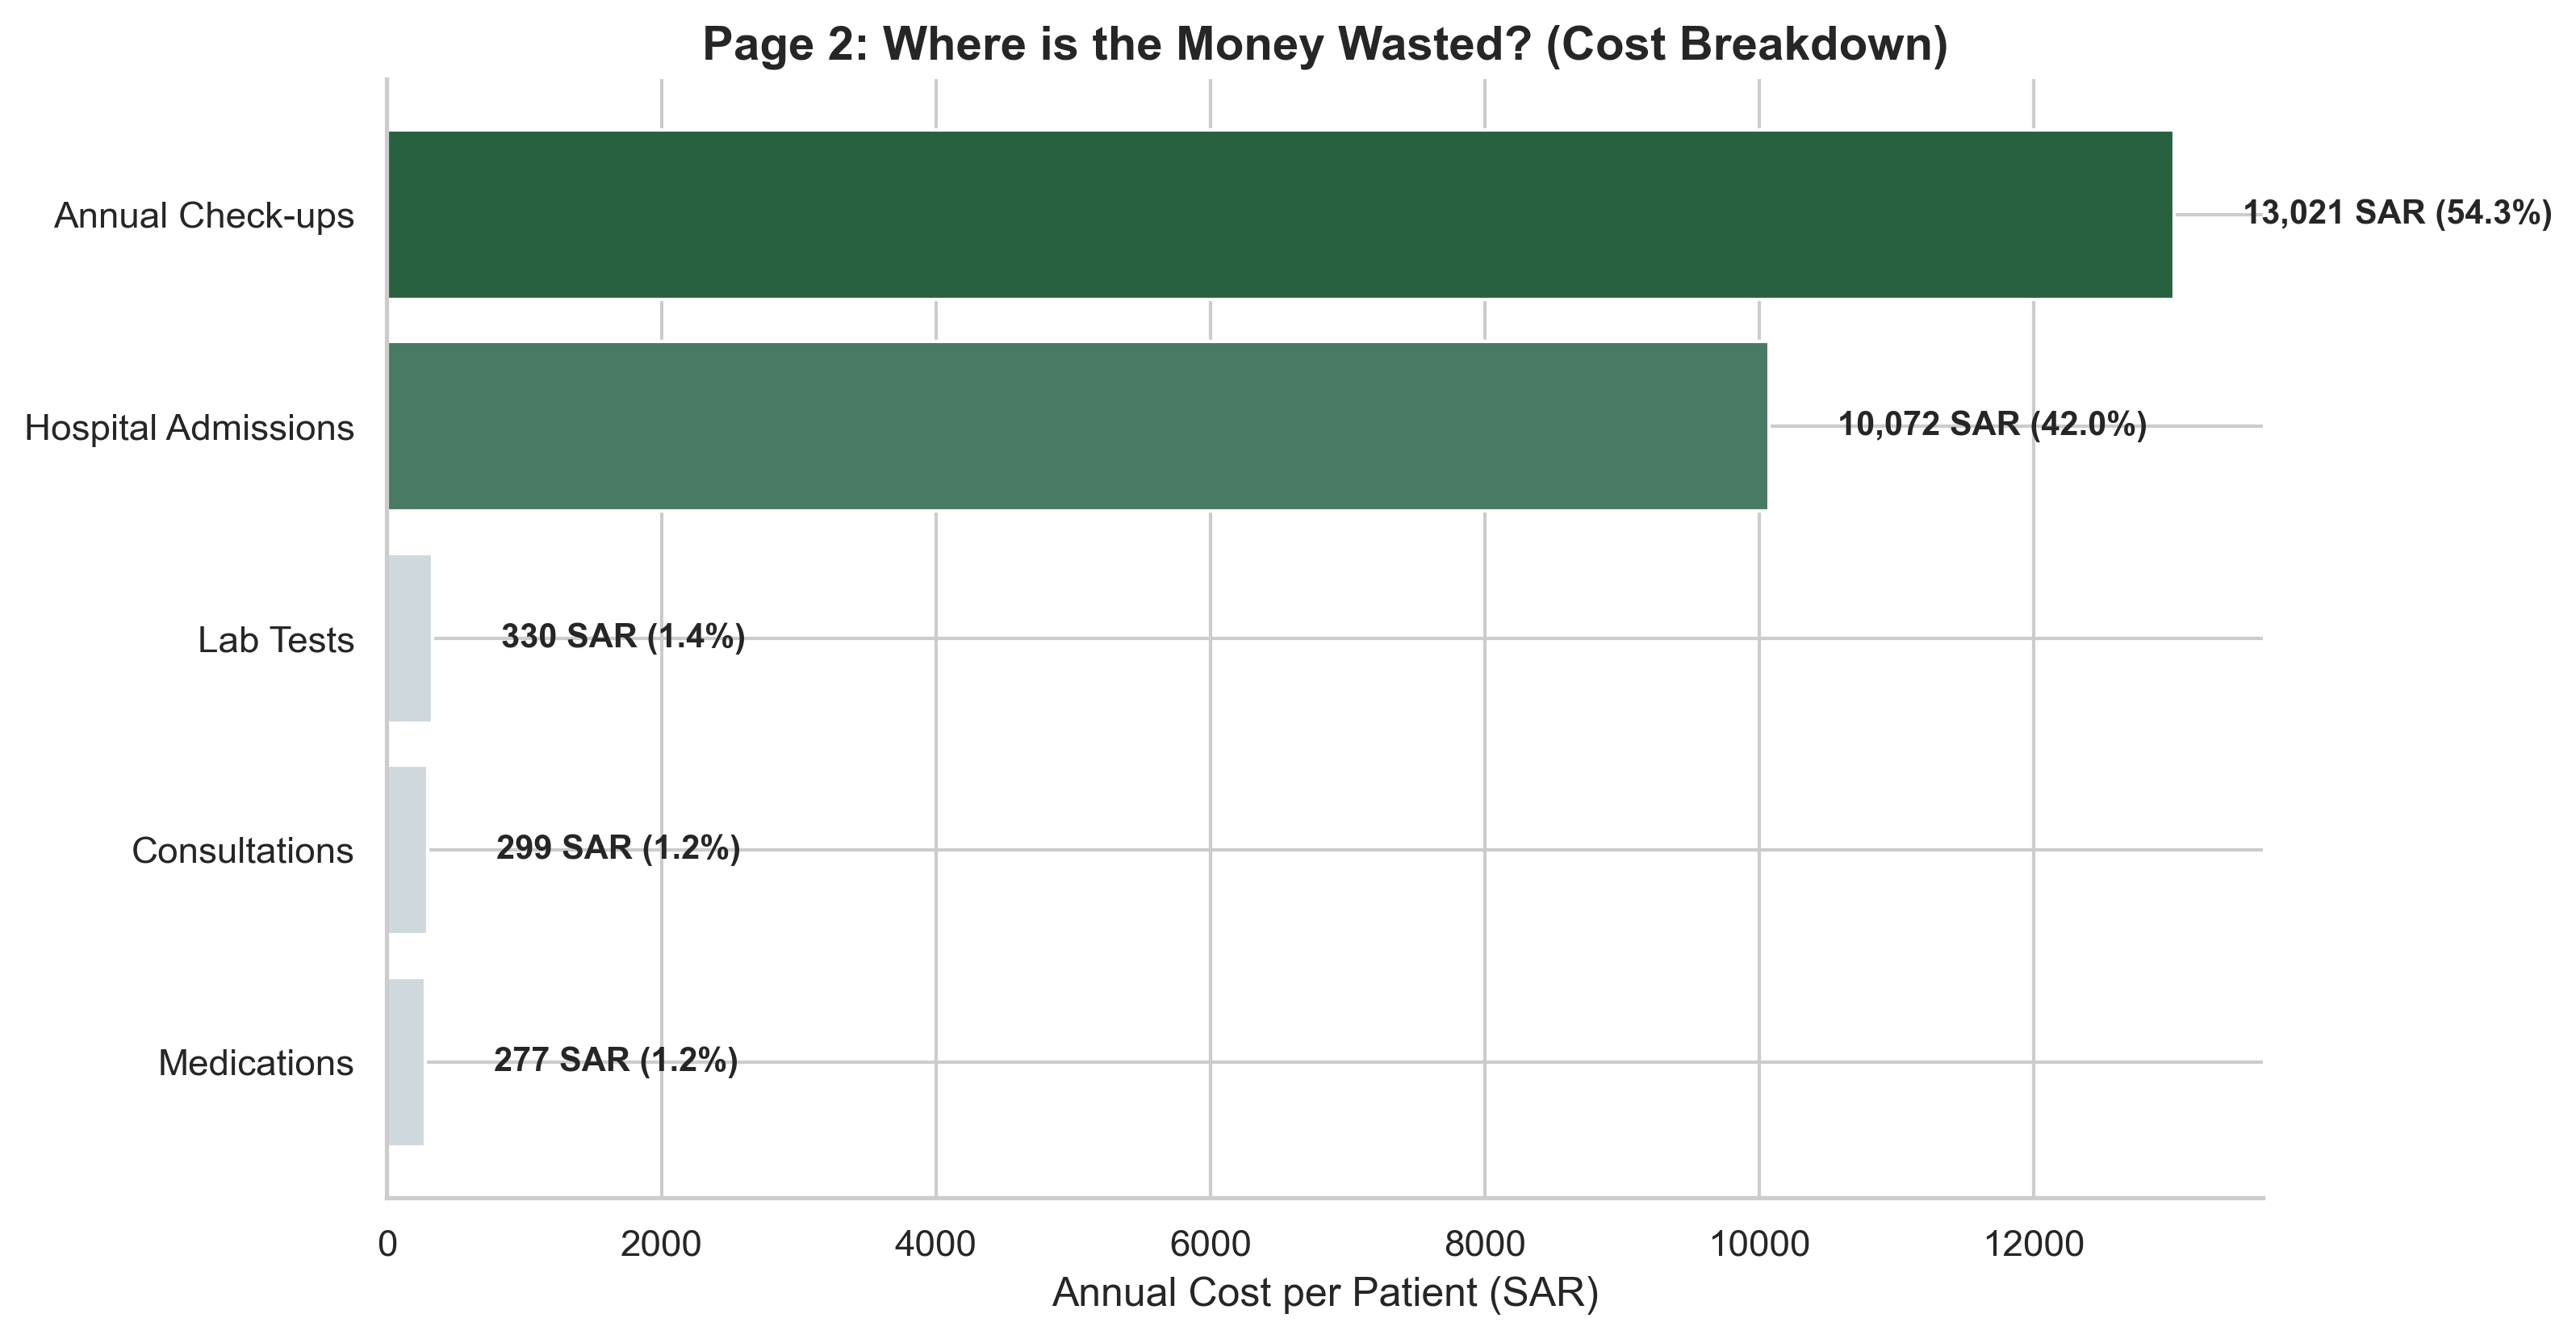

In [10]:
fig2, ax2 = plt.subplots(figsize=(10, 6))

df_micro_sorted = df_micro.sort_values('Annual_Cost_SAR', ascending=True)

bar_colors = ['#cfd8dc'] * 3 + ['#497a63','#286140'] # 3 Grey, 2 Red

bars = ax2.barh(df_micro_sorted['Component'], df_micro_sorted['Annual_Cost_SAR'], color=bar_colors)

ax2.set_title('Page 2: Where is the Money Wasted? (Cost Breakdown)', weight='bold')
ax2.set_xlabel('Annual Cost per Patient (SAR)')

for bar in bars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    
    pct = (width / total_patient_cost) * 100
    
    label_text = f"{width:,.0f} SAR ({pct:.1f}%)"
    
    ax2.text(width + 500, label_y, label_text, va='center', fontsize=10, weight='bold')



sns.despine()
#save_plot('Page2_Micro_Costing.png')

In [13]:
fig3, ax3 = plt.subplots(figsize=(10, 6))

est_screening_cost = (screening_metrics.get('Total_Screened', 0) * 200) / 1_000_000
roi_df = pd.DataFrame({
    'Metric': ['Est. Cost of Screening Program', 'Potential Treatment Savings'],
    'Value': [est_screening_cost, potential_savings_millions]
})

colors_roi = ['#497a63', '#286140']
sns.barplot(data=roi_df, x='Value', y='Metric', palette=colors_roi, ax=ax3)

ax3.set_title('Economic Feasibility - Cost vs. Savings', weight='bold')
ax3.set_xlabel('Millions (SAR)')

for p in ax3.patches:
    width = p.get_width()
    ax3.text(width + 0.05, p.get_y() + p.get_height()/2, 
             f'{width:.2f}M SAR', va='center', weight='bold', fontsize=11)



save_plot('ROI_Analysis.png')

C:\Users\DSC-GDP075\AppData\Local\Temp\ipykernel_21368\119156763.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=roi_df, x='Value', y='Metric', palette=colors_roi, ax=ax3)


   [Output] Chart saved as: ROI_Analysis.png
